In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import statsmodels.api as sm

# read in the datasets
df_train = pd.read_csv('//Users/asorrentino/ds-work/homework/final-projects/data/train.csv')
df_macro = pd.read_csv('/Users/asorrentino/ds-work/homework/final-projects/data/macro.csv')

In [11]:
df_train.describe()

,id,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
count,"30,471.00","30,471.00","24,088.00","30,304.00","20,899.00","20,899.00","16,866.00","20,899.00","20,899.00","16,912.00",...,"30,471.00","30,471.00","30,471.00","30,471.00","30,471.00","30,471.00","30,471.00","30,471.00","30,471.00","30,471.00"
mean,"15,237.92",54.21,34.40,7.67,12.56,1.83,"3,068.06",1.91,6.40,2.11,...,32.06,10.78,1.77,15.05,30.25,0.44,8.65,52.80,5.99,"7,123,035.28"
std,"8,796.50",38.03,52.29,5.32,6.76,1.48,"154,387.80",0.85,28.27,0.88,...,73.47,28.39,5.42,29.12,47.35,0.61,20.58,46.29,4.89,"4,780,111.33"
min,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,"100,000.00"
25%,"7,620.50",38.00,20.00,3.00,9.00,1.00,"1,967.00",1.00,1.00,1.00,...,2.00,1.00,0.00,2.00,9.00,0.00,0.00,11.00,1.00,"4,740,002.00"
50%,"15,238.00",49.00,30.00,6.50,12.00,1.00,"1,979.00",2.00,6.00,2.00,...,8.00,2.00,0.00,7.00,16.00,0.00,2.00,48.00,5.00,"6,274,411.00"
75%,"22,855.50",63.00,43.00,11.00,17.00,2.00,"2,005.00",2.00,9.00,3.00,...,21.00,5.00,1.00,12.00,28.00,1.00,7.00,76.00,10.00,"8,300,000.00"
max,"30,473.00","5,326.00","7,478.00",77.00,117.00,6.00,"20,052,009.00",19.00,"2,014.00",33.00,...,377.00,147.00,30.00,151.00,250.00,2.00,106.00,218.00,21.00,"111,111,112.00"


In [14]:
len(df_train.columns)

292

In [15]:
df_apt = df_train.loc[:, 'id':'sub_area']
df_apt.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,product_type,sub_area
0,1,2011-08-20,43,27.00,4.00,nan,nan,nan,nan,nan,nan,Investment,Bibirevo
1,2,2011-08-23,34,19.00,3.00,nan,nan,nan,nan,nan,nan,Investment,Nagatinskij Zaton
2,3,2011-08-27,43,29.00,2.00,nan,nan,nan,nan,nan,nan,Investment,Tekstil'shhiki
3,4,2011-09-01,89,50.00,9.00,nan,nan,nan,nan,nan,nan,Investment,Mitino
4,5,2011-09-05,77,77.00,4.00,nan,nan,nan,nan,nan,nan,Investment,Basmannoe


In [16]:
df_area = df_train.loc[:, 'sub_area':'market_count_5000']
df_area.head()

,sub_area,area_m,raion_popul,green_zone_part,indust_part,children_preschool,preschool_quota,preschool_education_centers_raion,children_school,school_quota,...,cafe_count_5000_price_1500,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000
0,Bibirevo,"6,407,578.10",155572,0.19,0.00,9576,"5,001.00",5,10309,"11,065.00",...,40,9,4,0,13,22,1,0,52,4
1,Nagatinskij Zaton,"9,589,336.91",115352,0.37,0.05,6880,"3,119.00",5,7759,"6,237.00",...,36,15,3,0,15,29,1,10,66,14
2,Tekstil'shhiki,"4,808,269.83",101708,0.11,0.12,5879,"1,463.00",4,6207,"5,580.00",...,25,10,3,0,11,27,0,4,67,10
3,Mitino,"12,583,535.69",178473,0.19,0.07,13087,"6,839.00",9,13670,"17,063.00",...,15,11,2,1,4,4,0,0,26,3
4,Basmannoe,"8,398,460.62",108171,0.02,0.04,5706,"3,240.00",7,6748,"7,770.00",...,552,319,108,17,135,236,2,91,195,14


In [19]:
len(df_train.index)

30471

In [20]:
len(df_area.index)

30471

In [21]:
len(df_area.columns)

279

In [22]:
len(df_macro.index), len(df_macro.columns)

(2484, 100)

In [137]:
df_macro.tail()

,timestamp,oil_urals,gdp_quart,gdp_quart_growth,cpi,ppi,gdp_deflator,balance_trade,balance_trade_growth,usdrub,...,provision_retail_space_modern_sqm,turnover_catering_per_cap,theaters_viewers_per_1000_cap,seats_theather_rfmin_per_100000_cap,museum_visitis_per_100_cap,bandwidth_sports,population_reg_sports_share,students_reg_sports_share,apartment_build,apartment_fund_sqm
2479,2016-10-15,44.37,"19,979.40",-0.60,531.00,601.90,133.16,5.82,2.60,62.96,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2480,2016-10-16,44.37,"19,979.40",-0.60,531.00,601.90,133.16,5.82,2.60,62.96,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2481,2016-10-17,44.37,"19,979.40",-0.60,531.00,601.90,133.16,5.82,2.60,63.09,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2482,2016-10-18,44.37,"19,979.40",-0.60,531.00,601.90,133.16,5.82,2.60,62.95,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2483,2016-10-19,44.37,"19,979.40",-0.60,531.00,601.90,133.16,5.82,2.60,62.95,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [26]:
days = df_train.drop_duplicates('timestamp')
len(days.index), len(days.columns)

(1161, 292)

In [41]:
sub_areas = df_area.drop_duplicates('sub_area')
sub_areas.count()

sub_area                                 146
area_m                                   146
raion_popul                              146
green_zone_part                          146
indust_part                              146
children_preschool                       146
preschool_quota                          124
preschool_education_centers_raion        146
children_school                          146
school_quota                             125
school_education_centers_raion           146
school_education_centers_top_20_raion    146
hospital_beds_raion                       84
healthcare_centers_raion                 146
university_top_20_raion                  146
sport_objects_raion                      146
additional_education_raion               146
culture_objects_top_25                   146
culture_objects_top_25_raion             146
shopping_centers_raion                   146
office_raion                             146
thermal_power_plant_raion                146
incinerati

In [139]:
df_train['price_doc'].describe()

count        30,471.00
mean      7,123,035.28
std       4,780,111.33
min         100,000.00
25%       4,740,002.00
50%       6,274,411.00
75%       8,300,000.00
max     111,111,112.00
Name: price_doc, dtype: float64

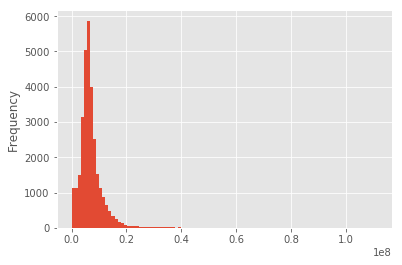

In [96]:
df_train['price_doc'].plot.hist(bins=100)

In [27]:
df_train['timestamp'].head()

0    2011-08-20
1    2011-08-23
2    2011-08-27
3    2011-09-01
4    2011-09-05
Name: timestamp, dtype: object

In [133]:
df_train['timestamp'].tail()

30466    2015-06-30
30467    2015-06-30
30468    2015-06-30
30469    2015-06-30
30470    2015-06-30
Name: timestamp, dtype: object

In [134]:
df_macro['timestamp'].head()

0    2010-01-01
1    2010-01-02
2    2010-01-03
3    2010-01-04
4    2010-01-05
Name: timestamp, dtype: object

In [135]:
df_macro['timestamp'].tail()

2479    2016-10-15
2480    2016-10-16
2481    2016-10-17
2482    2016-10-18
2483    2016-10-19
Name: timestamp, dtype: object